# Project Name - Online Retail Customer Segmentation

# Project Type - Unsupervised Machine Learning

# Contribution - Individual

# Name - Tushar Raskar

# GitHub Link

https://github.com/tusharraskar/Online-Retail-Customer-Segmentation.git

# Problem Statement

### Business Problem Overview

Online retail businesses face the challenge of understanding their customer base in order to effectively target their marketing efforts and improve customer satisfaction. 

Customer segmentation is a process of dividing customers into groups based on shared characteristics such as demographics, purchasing behavior, and online behavior. 

The goal of online retail customer segmentation is to gain insights into customer needs and preferences, and to develop targeted marketing strategies that address the unique needs and behaviors of each segment. 

This can help increase customer loyalty, improve sales, and drive growth for the business.

### Business Objective

The objective of online retail customer segmentation is to identify and understand different customer segments and their unique needs, behaviors, and preferences. 

This allows the business to tailor their marketing and sales strategies to each segment, increase customer satisfaction, and ultimately increase customer loyalty and revenue. 

The ultimate goal is to provide a personalized experience for each customer, resulting in increased brand loyalty and long-term customer engagement.

### Feature Description 

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
# Import Libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Dataset Loading
data = pd.read_csv('Online Retail.csv')

In [3]:
# Viewing data's first 5 row

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [4]:
# Chicking shape of data

data.shape

(541909, 8)

#### Data has 541909 rows and 8 columns.

In [5]:
# Dataset Columns
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
# Checking data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Ckechking null or missing values

In [7]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

##### In our data there is null valuse in
1. Description = 1454
2. CustomerID = 135080

Customer ID is our Identification feature and Description has Product description.

We cannot do Clustering without Customer ID values.

## Checking unique values in each feature

In [8]:
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

## Data Describe

In [9]:
# Creating copy of the current data and assigning to df
df=data.copy()

In [10]:
df.dropna(subset=['CustomerID'],inplace=True) 

In [11]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
data.describe() 

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Text(0.5, 0, 'Quantity')

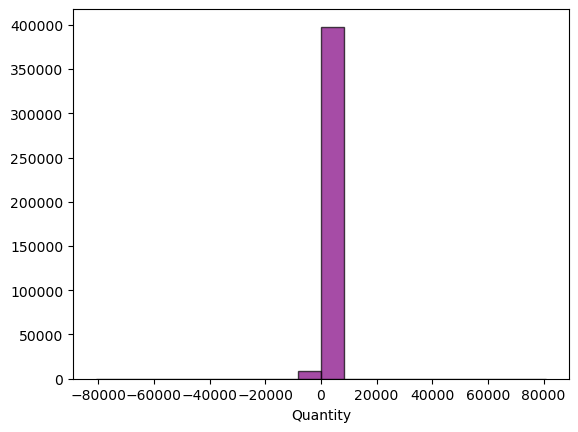

In [13]:
# Checking distrubution of Quantity

plt.hist(df['Quantity'], bins=20, color='purple', edgecolor='black', alpha=0.7)
plt.xlabel('Quantity')

Customer ID is our Identification feature and Description has Product description.

We cannot do Clustering without Customer ID values.

Hence, droppingg the missing values

In [14]:
# removing data which hnave negetive values
df=df[df['Quantity']>0]

In [15]:
# Checking data types
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [16]:
df.shape

(397924, 8)

### Our data got reduced now we have 397924 datapoints

# Feature Engineering

In [18]:
# Converting InvoiceDate to datetime. InvoiceDate is in format of 12/1/10 8:26.
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format='%m/%d/%y %H:%M')

In [19]:
df["year"] = df["InvoiceDate"].apply(lambda x: x.year)
df["month_num"] = df["InvoiceDate"].apply(lambda x: x.month)
df["day_num"] = df["InvoiceDate"].apply(lambda x: x.day)
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"] = df["InvoiceDate"].apply(lambda x: x.minute)

In [20]:
# extracting month from the Invoice date
df['Month']=df['InvoiceDate'].dt.month_name()

In [21]:
# extracting day from the Invoice date
df['Day']=df['InvoiceDate'].dt.day_name()

In [24]:
# Making total amount column by multiplying quantity with price
df['TotalAmount']=df['Quantity']*df['UnitPrice'] 

In [25]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,Month,Day,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34


# Exploratory Data Analysis

In [26]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month_num', 'day_num',
       'hour', 'minute', 'Month', 'Day', 'TotalAmount'],
      dtype='object')

In [27]:
top_10_product=df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'}).head(10)
top_10_product

,Product_name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397
5,LUNCH BAG RED RETROSPOT,1316
6,SET OF 3 CAKE TINS PANTRY DESIGN,1159
7,LUNCH BAG BLACK SKULL.,1105
8,POSTAGE,1099
9,PACK OF 72 RETROSPOT CAKE CASES,1068


Text(0.5, 1.0, 'Top 10 products')

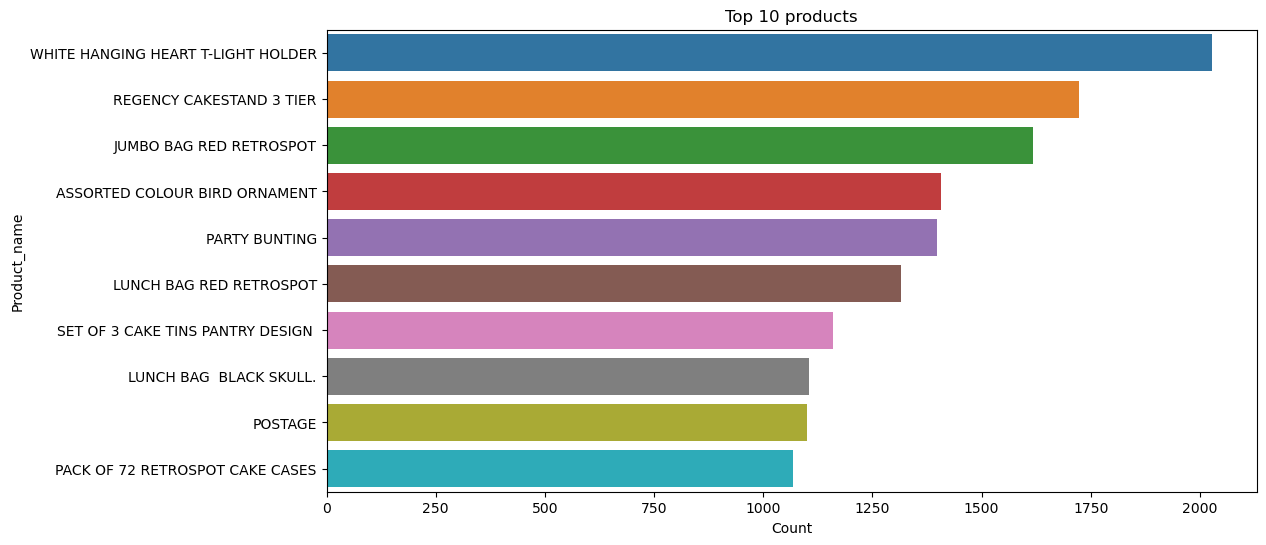

In [28]:
# top 10 product in terms of description
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_product['Count'],y=top_10_product['Product_name'])
plt.title('Top 10 products')